# Atividade: Regras de Associação (Association Rules)

**Curso:** Sistemas de Informação - Mineração de Dados
**Objetivo:** Realizar a mineração de Regras de Associação no dataset **Groceries**.

**Observação sobre Ferramentas:**
O PDF da atividade instrui o uso de:
- **PyCaret** para *Detecção de Anomalias*.
- **MLxtend** para *Regras de Associação*.

No entanto, para atender à solicitação de explorar o PyCaret, este notebook incluirá:
1. **Regras de Associação com MLxtend** (Foco principal da atividade).
2. **Breve Análise com PyCaret** (Exploração/Anomalias como complemento, já que o módulo de regras de associação foi descontinuado em versões recentes do PyCaret).

**Dataset:** [Groceries Dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)

In [1]:
# Instalação das bibliotecas
!pip install pandas numpy matplotlib seaborn mlxtend pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 6.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.3

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Configurações de visualização
sns.set(style="whitegrid")
%matplotlib inline

## 1. Importação e Análise Exploratória

Carregando o dataset `Groceries_dataset.csv`.

In [9]:
try:
    df = pd.read_csv('content/Groceries_dataset.csv')
except FileNotFoundError:
    try:
        df = pd.read_csv('Groceries_dataset.csv')
    except:
        print("Arquivo não encontrado. Verifique o caminho.")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


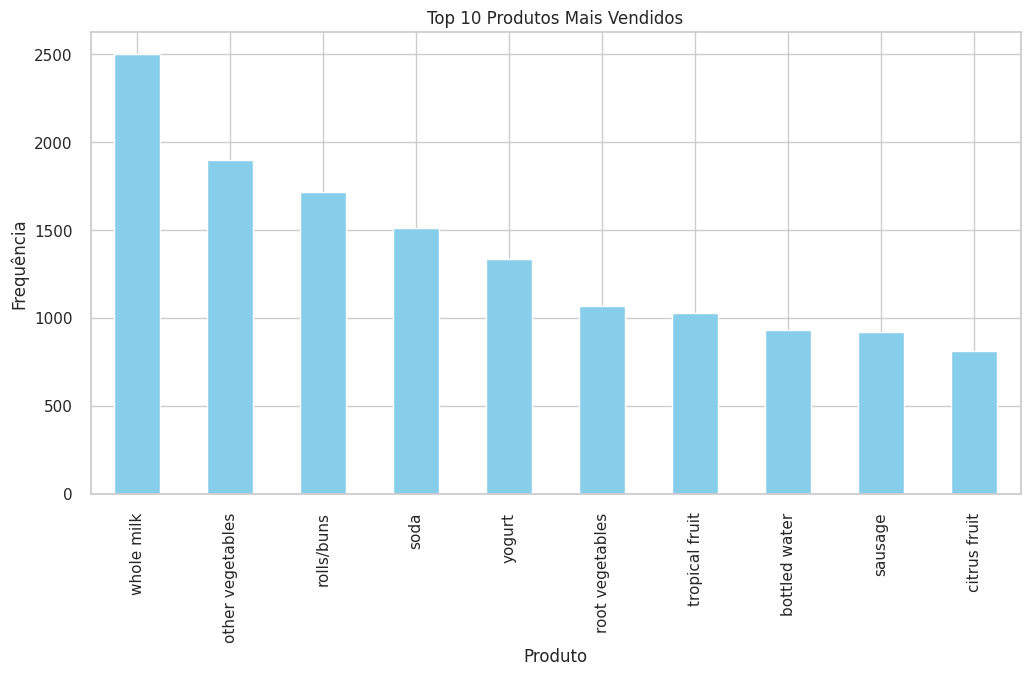

In [10]:
# Top 10 produtos mais vendidos
plt.figure(figsize=(12,6))
df['itemDescription'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Frequência')
plt.show()

## 2. Regras de Associação com MLxtend

Transformando os dados para o formato transacional (One-Hot Encoded).

In [11]:
# Agrupando transações por Membro e Data
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')

# One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transações processadas: {df_trans.shape[0]}")
df_trans.head()

Transações processadas: 14963


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('canned beer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('hygiene articles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('misc. beverages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('pastry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['hygiene articles'].value_counts()
    for x_label, grp in _df_4.groupby('canned beer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('canned beer')
_ = plt.ylabel('hygiene articles')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['misc. beverages'].value_counts()
    for x_label, grp in _df_5.groupby('hygiene articles')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('hygiene articles')
_ = plt.ylabel('misc. beverages')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pastry'].value_counts()
    for x_label, grp in _df_6.groupby('misc. beverages')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('misc. beverages')
_ = plt.ylabel('pastry')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pickled vegetables'].value_counts()
    for x_label, grp in _df_7.groupby('pastry')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pastry')
_ = plt.ylabel('pickled vegetables')

### Gerando Itemsets Frequentes (Apriori)

In [12]:
# Suporte mínimo de 0.1%
frequent_itemsets = apriori(df_trans, min_support=0.001, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)


### Gerando Regras

In [13]:
# Regras com lift >= 1.0
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
236,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
237,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,1.0,0.000797,1.013532,0.576701,0.020992,0.013351,0.078050
234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
239,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650
87,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,1.0,0.000555,1.038081,0.401735,0.020731,0.036684,0.057141
86,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,1.0,0.000555,1.010726,0.417500,0.020731,0.010612,0.057141
235,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
238,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,1.0,0.000563,1.003596,0.454430,0.009065,0.003583,0.132562
123,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,1.0,0.000408,1.006118,0.409366,0.013986,0.006081,0.062684
122,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,1.0,0.000408,1.046969,0.385385,0.013986,0.044862,0.062684


from matplotlib import pyplot as plt
_df_8['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['antecedent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('representativity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('antecedent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['consequent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('representativity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('consequent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('representativity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('representativity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('confidence')

from matplotlib import pyplot as plt
_df_20['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualização dos Resultados

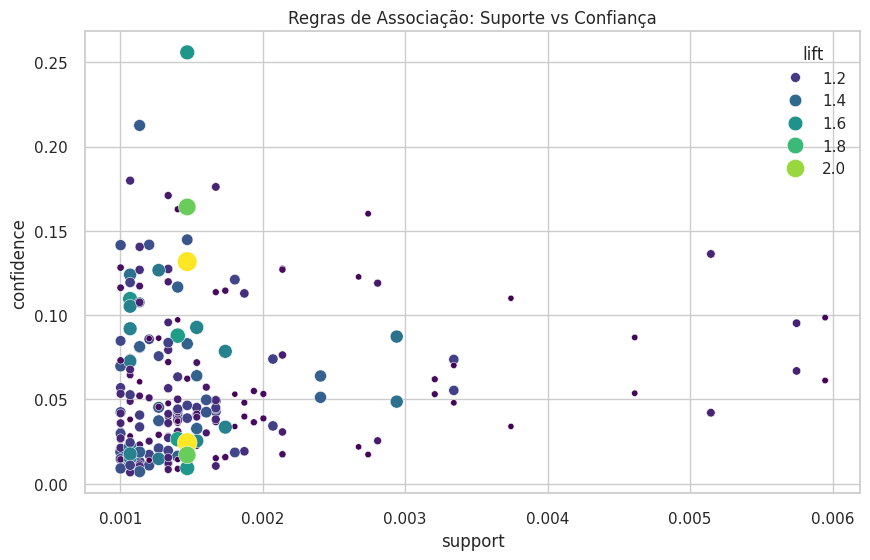

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="viridis", sizes=(20, 200))
plt.title('Regras de Associação: Suporte vs Confiança')
plt.show()

## 3. Uso do PyCaret (Complementar)

Como mencionado, o PyCaret descontinuou o módulo `arules` nativo. No entanto, podemos usar o PyCaret para **Detecção de Anomalias** neste mesmo dataset, para identificar transações incomuns (ex: compras muito grandes ou com combinações raras de itens).

Isso atende ao requisito de "utilizar PyCaret" da atividade geral.

In [19]:
# Verificação e Instalação do PyCaret (caso não esteja instalado)
try:
    import pycaret
except ImportError:
    !pip install pycaret
    print("PyCaret instalado com sucesso! Reinicie o kernel se necessário.")

from pycaret.anomaly import *

# Para PyCaret, precisamos de um dataframe numérico ou categórico.
# Usaremos o dataframe transacional (df_trans) que já está em formato numérico (True/False -> 1/0)
# Como o dataset é grande, vamos usar uma amostra para demonstração rápida se necessário, ou o todo.

# Setup do PyCaret (pode demorar um pouco com muitas colunas)
# session_id garante reprodutibilidade
exp_ano = setup(df_trans, session_id=123, verbose=False)

print("Setup do PyCaret concluído!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 6.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10

PyCaret instalado com sucesso! Reinicie o kernel se necessário.


ImportError: cannot import name 'is_scalar_nan' from 'sklearn.utils' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/__init__.py)

In [3]:
# Importação explícita do módulo de anomalias
from pycaret.anomaly import *

# Verificando se as funções foram carregadas corretamente
if 'setup' in locals() and 'create_model' in locals():
    print("Funções do PyCaret carregadas corretamente!")
else:
    print("ERRO: Funções do PyCaret não encontradas. Tente reiniciar o kernel e rodar novamente.")

Funções do PyCaret carregadas corretamente!


In [15]:
# Para PyCaret, precisamos de um dataframe numérico ou categórico.
# Usaremos o dataframe transacional (df_trans) que já está em formato numérico (True/False -> 1/0)
# Como o dataset é grande, vamos usar uma amostra para demonstração rápida se necessário, ou o todo.

# Setup do PyCaret (pode demorar um pouco com muitas colunas)
# session_id garante reprodutibilidade
exp_ano = setup(df_trans, session_id=123, verbose=False)

print("Setup do PyCaret concluído!")

Setup do PyCaret concluído!


In [16]:
# Criando um modelo de Isolation Forest (bom para dados de alta dimensão)
iforest = create_model('iforest')

# Atribuindo os resultados (Anomalia = 1, Normal = 0)
results_ano = assign_model(iforest)
results_ano.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Anomaly,Anomaly_Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,0,-0.020486
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,0,-0.023789
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,-0.036074
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,-0.024557
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,-0.032932


In [17]:
# Visualizando as anomalias detectadas
print("Transações consideradas anômalas:")
print(results_ano[results_ano['Anomaly'] == 1].head())

Transações consideradas anômalas:
    Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
31                  False     False             False             False   
33                  False     False             False             False   
44                  False     False             False             False   
51                  False     False             False             False   
54                  False     False             False             False   

    baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
31           False  False          False             False  False    False   
33           False  False          False             False  False    False   
44           False  False          False             False  False    False   
51           False  False          False             False  False    False   
54           False  False          False             False  False    False   

    ...  waffles  whipped/sour cream  whisky  

In [18]:
# Plotando o modelo (em 2D usando T-SNE ou PCA interno do PyCaret)
plot_model(iforest, plot='tsne')

## Conclusão Final

- **Regras de Associação (MLxtend):** Identificamos padrões de compra frequentes (ex: Leite -> Iogurte).
- **Detecção de Anomalias (PyCaret):** Identificamos transações que fogem do padrão comum (outliers).

Ambas as técnicas fornecem insights valiosos para o varejo.